In [26]:
# libraries
import pandas as pd
import numpy as np
import regex as re
import requests
import spacy
import time
import redis
import missingno as msno
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import ElementNotInteractableException
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [ ]:
firefox_driver_path = Service("/home/royale/Documents/py/jupyter/webscraping projects/Selenium projects/webdrivers/geckodriver")
r = redis.Redis(host="localhost", port=6379)
# firefox_driver_path = ("/home/royale/Documents/py/jupyter/webscraping projects/Selenium projects/webdrivers/geckodriver")

## Scraping the review data from the given url

In [ ]:
firefox_driver_path = Service("/home/royale/Documents/py/jupyter/webscraping projects/Selenium projects/webdrivers/geckodriver")
browser = webdriver.Firefox(service= firefox_driver_path)
url = "https://www.imdb.com/title/tt9419884/reviews?ref_=tt_urv"
browser.get(url)


content_holder = browser.find_elements(By.CLASS_NAME, "lister-list")
load_more_button = browser.find_element(By.ID, "load-more-trigger")

# movie_dict = {}
# review_title = []
# review_content = []
pages = 1


for pages in range(150):
    print(f"page {pages + 1}")
    load_more_button.send_keys(Keys.PAGE_DOWN)
    time.sleep(5)
    load_more_button.click()
    pages += 1

else:
    print("storing scraped data...")
    for elements in content_holder:
        # The review tags
        review_title_tag = elements.find_elements(By.CLASS_NAME, "title")
        review_content_tag = elements.find_elements(By.CLASS_NAME, "text")

        # The review list
        review_title = [titles.text for titles in review_title_tag]
        review_content = [contents.text for contents in review_content_tag]



    movie_dict = {
        "Review_title" : pd.Series(review_title),
        "Review_content": pd.Series(review_content)
    }
    review_data = pd.DataFrame(movie_dict)
    browser.close()


## Saving the data in a csv format

In [ ]:
review_data.to_csv("Doctor_strange_in_the _multiverse_of_madness_movie_review.csv")

## Load the data for text preprocessing for sentiment analysis

In [22]:
nlp = spacy.load("en_core_web_lg")

In [31]:
filename = "Doctor_strange_in_the _multiverse_of_madness_movie_review.csv"

In [32]:
movie_review = pd.read_csv(filename)

In [33]:
movie_review

,Review_title,Review_content
0,"This was Wandavision 2, not Doctor Strange 2",NaN
1,"Well, it was shiny and colourful",NaN
2,Not enough multiverse and maybe too much madness,Sam Raimi definitely put a splash of horror in...
3,"Scarlet Witch: The Movie, ft: Sorcerer Supremes",NaN
4,"Terrible plot and script, boring and pointless",I always had some issues with MCU films but no...
...,...,...
3757,NaN,NaN
3758,NaN,NaN
3759,NaN,NaN
3760,NaN,NaN


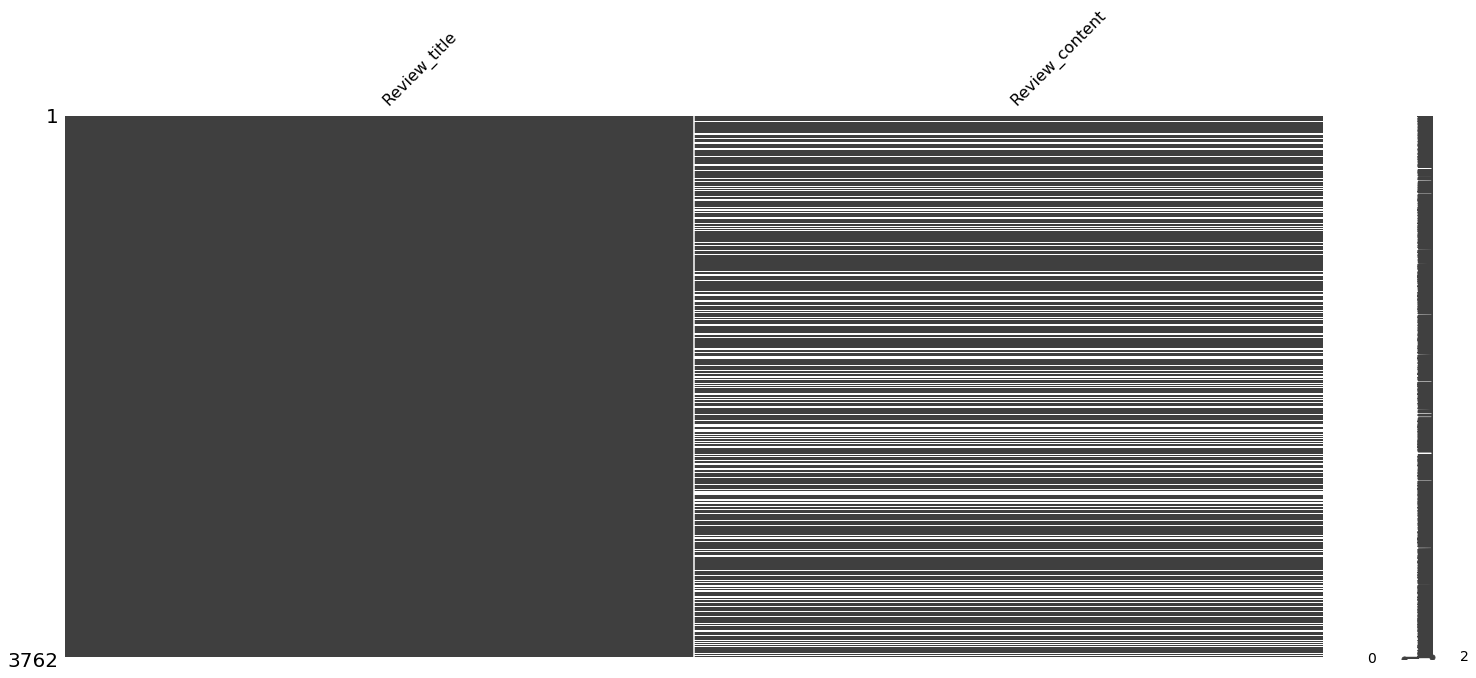

In [35]:
msno.matrix(movie_review);